# Q2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from main import func, grad, updt, ex3a, ex3b, ex4, getParams

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## a + b

We choose a,b,c values = 1,1,1. See main.py 

In [3]:
X = np.arange(-50.5,50.5)
Y = func(X)
dydx = grad(X)

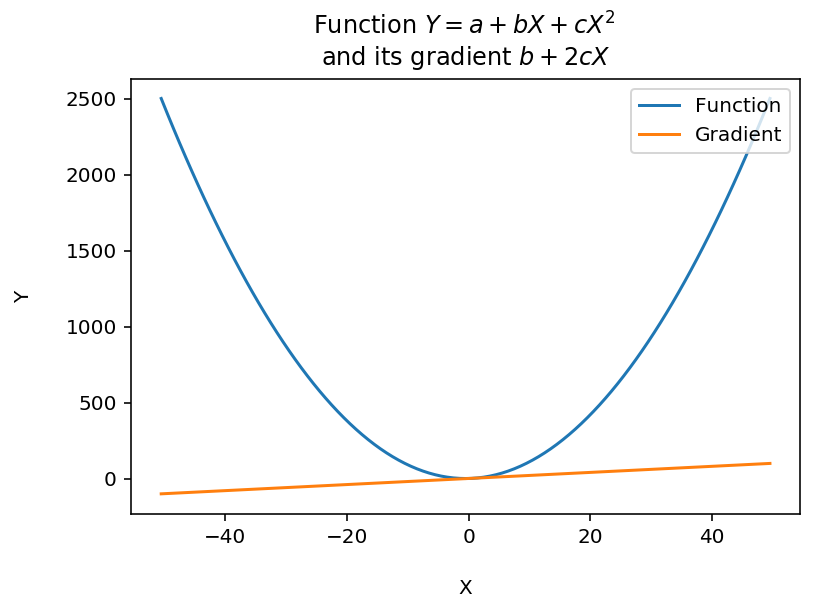

In [4]:
# plot both
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot(X, Y)
ax.plot(X,dydx)
plt.title('Function ' + r'$ Y = a + bX + cX^2$' + ' \nand its gradient ' + r'$b + 2cX$')
ax.legend(('Function', 'Gradient'),loc='upper right')
ax.set_xlabel('X',labelpad=16)
ax.set_ylabel('Y',labelpad=16)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16
plt.show();

## c

In [5]:
print(str(X[np.where(dydx==0)][0]) + ',' + str(Y[np.where(dydx==0)][0]))

-0.5,0.75


## d

updt is implemented in main.py

In [6]:
# For example
updt(grad, X[0], a=0.9)

39.5

## e

In [7]:
epsilon = 10e-5
err = 1
X0 = 20

while err > epsilon:   
    X1 = updt(grad, X0, a=0.6)
    err = np.abs(X1 - X0)
    X0 = X1
    print(X0)

-4.599999999999998
0.3199999999999994
-0.6639999999999998
-0.46720000000000006
-0.50656
-0.498688
-0.5002624
-0.49994752
-0.500010496


We can see that using a reasonable alpha value, we converge to the value from c

# Q3

In [8]:
import requests
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,hinge_loss
import statsmodels.api as sm

# load data
mnist = fetch_mldata('MNIST original')
data_df = pd.DataFrame(mnist['data'])
label_df = pd.DataFrame(mnist['target'])

## a

In [9]:
# REMOVE THESE LINES WHEN SUBMITTING
# Take only a small subset of the data
ind = np.random.randint(0, 69999, 10000)
X = data_df.iloc[ind,:]
y = label_df.iloc[ind]
y  = np.squeeze(y,1)

In [10]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [11]:
# Fit the model (implemented in main.py)
clf = ex3a(X_train, y_train, 'linear',1) # WHY NOT WORKING WHEN FUNCTIONS ARE IN MAIN ?


## b

In [12]:
y_pred_train, y_pred_test, train_error, test_error = ex3b(clf, X_train, y_train, X_test, y_test)

print('confusion matrix train data:\n ' + str(confusion_matrix(y_train, y_pred_train)) + '\n')
print('confusion matrix test data:\n ' + str(confusion_matrix(y_test, y_pred_test)) + '\n')
print('train error: ' + str(train_error))
print('test error: ' + str(test_error))

confusion matrix train data:
 [[674   0   0   0   0   0   0   0   0   0]
 [  0 812   0   0   0   0   0   0   0   0]
 [  0   0 682   0   0   0   0   0   0   0]
 [  0   0   0 709   0   0   0   0   0   0]
 [  0   0   0   0 647   0   0   0   0   0]
 [  0   0   0   0   0 631   0   0   0   0]
 [  0   0   0   0   0   0 689   0   0   0]
 [  0   0   0   0   0   0   0 716   0   0]
 [  0   0   0   0   0   0   0   0 711   0]
 [  0   0   0   0   0   0   0   0   0 729]]

confusion matrix test data:
 [[267   0   2   1   1   2   0   1   2   0]
 [  0 341   2   0   0   1   0   4   0   0]
 [  4   8 251   4   3   1   3   2   4   1]
 [  4   2   7 269   0   7   2   2   2   0]
 [  0   1   0   0 275   2   3   3   0  12]
 [  1   2   0  12   3 236   2   1   3   2]
 [  1   0   2   0   1   1 303   0   0   0]
 [  0   2   2   2   5   0   0 319   0  10]
 [  0   5   8  12   6   7   3   0 246   2]
 [  0   4   0   2  10   2   0   6   0 281]]

train error: 0.0
test error: 0.07066666666666666


## c

The following code is commented out so it will not run automatically. 

In [13]:
# Run over several cost values and kernel types
# C = [0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10] #np.arange(0.1,100,0.1)
# kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

# df_errors = pd.DataFrame(index=np.arange(0,np.size(C)*np.size(kernel_types)-1),
#                          columns=['kernel','C','train_error','test_error'])

# ind = 0
# for k in kernel_types:
#     for c in C:
#         model = ex3a(X_train,y_train,k,c)
#         _,_,train_error,test_error = ex3b(model, X_train, y_train, X_test, y_test)
#         df_errors.iloc[ind] = [k,c,train_error,test_error]
#         ind += 1

Yes, we can obtain better results by using a polynomial kernel, improving the results from more than 8% error on the 
test data to less than 5% error, when calculated by the accuracy_score. 
In addition, it looks like taking a cost of 1e-6 will slightly improve the results on the test data when using a linear kernel. For large cost values, no change is seen. In addition, rbf and sigmoid kernels had poor performance.

## d

In [19]:
# plot the results saved in exported excel file
df = pd.read_excel('error_matrix.xlsx')
df.reset_index(drop=True, inplace=True)
df.drop(df.iloc[-2:,:].index, inplace=True)
df.head()

,kernel,C,train_error,test_error,train_hl,test_hl
0,linear,1.000000e-08,0.109857,0.124333,0.332882,0.372038
1,linear,1.000000e-07,0.062000,0.083000,0.174891,0.232834
2,linear,1.000000e-06,0.025143,0.073667,0.064654,0.200429
3,linear,1.000000e-05,0.001857,0.086000,0.009450,0.221858
4,linear,1.000000e-04,0.000000,0.083667,0.005953,0.216753


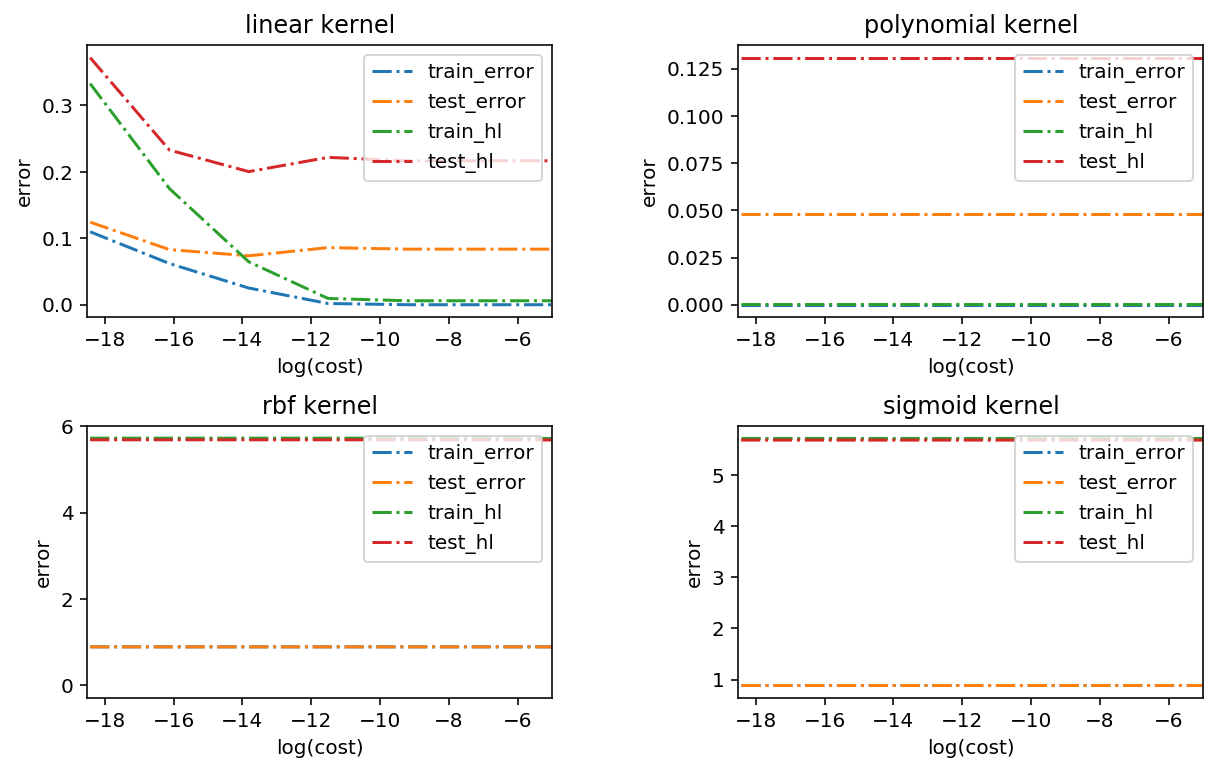

In [28]:
# plot the results 
%config InlineBackend.figure_format = 'retina'
# plt.style.use('bmh')
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

temp = df[df['kernel']=='linear']
ax[0,0].plot(np.log(temp.C), temp.train_error,'-.')
ax[0,0].plot(np.log(temp.C), temp.test_error,'-.') 
ax[0,0].plot(np.log(temp.C), temp.train_hl,'-.')
ax[0,0].plot(np.log(temp.C), temp.test_hl,'-.')
ax[0,0].set_xlim(-18.5,-5)
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('log(cost)')
ax[0,0].set_ylabel('error')
ax[0,0].set_title('linear kernel')

temp = df[df['kernel']=='poly']
ax[0,1].plot(np.log(temp.C), temp.train_error,'-.')
ax[0,1].plot(np.log(temp.C), temp.test_error,'-.') 
ax[0,1].plot(np.log(temp.C), temp.train_hl,'-.')
ax[0,1].plot(np.log(temp.C), temp.test_hl,'-.')
ax[0,1].set_xlim(-18.5,-5)
ax[0,1].legend(loc='upper right')
ax[0,1].set_xlabel('log(cost)')
ax[0,1].set_ylabel('error')
ax[0,1].set_title('polynomial kernel')

temp = df[df['kernel']=='rbf']
ax[1,0].plot(np.log(temp.C), temp.train_error,'-.')
ax[1,0].plot(np.log(temp.C), temp.test_error,'-.') 
ax[1,0].plot(np.log(temp.C), temp.train_hl,'-.')
ax[1,0].plot(np.log(temp.C), temp.test_hl,'-.')
ax[1,0].set_xlim(-18.5,-5)
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('log(cost)')
ax[1,0].set_ylabel('error')
ax[1,0].set_title('rbf kernel')

temp = df[df['kernel']=='sigmoid']
ax[1,1].plot(np.log(temp.C), temp.train_error,'-.')
ax[1,1].plot(np.log(temp.C), temp.test_error,'-.') 
ax[1,1].plot(np.log(temp.C), temp.train_hl,'-.')
ax[1,1].plot(np.log(temp.C), temp.test_hl,'-.')
ax[1,1].set_xlim(-18.5,-5)
ax[1,1].legend(loc='upper right')
ax[1,1].set_xlabel('log(cost)')
ax[1,1].set_ylabel('error')
ax[1,1].set_title('sigmoid kernel')

# set parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
plt.show();

# Q4

In [199]:
def perceptron(data):  # x is a matrix of size mXn, m nunmber of samples, n number of features. y is a 1D array
    np.set_printoptions(precision=10)
    X = data['X']
    y = data['y']
    w_t = np.zeros(X.shape[1]) # the weights at time zero. size: number of features. 
    maxIter = 10000 # number of iterations. if doesn't work, maybe change to a while loop.
    m = X.shape[0] # number of samples
    for t in range(maxIter):
        for i in range(m): # for each sample i in the training set 
            if(y[i]*np.dot(X[i,:],w_t) <= 0): 
                w_t1 = w_t + y[i]*X[i,:]
                w_t = w_t1 
                break
    return w_t

In [200]:
# Testing with seperable data
X = np.random.uniform(-1,1,size=[1000,10])
w_star = [2,6,3,8,-2,7,9,3,-9,1]
y = np.sign(np.dot(X,w_star))
data = dict({'X':X, 'y':y})
w = perceptron(data)
w

array([ 10.4359231443,  31.2866608696,  16.0706812523,  41.343639426 ,
        -9.9371364544,  36.3652223382,  46.9756440187,  14.9427134056,
       -47.5317730342,   4.1462521109])

In [201]:
w/5.74

array([ 1.8181050774,  5.4506377822,  2.799770253 ,  7.2027246387,
       -1.7312084415,  6.3354045885,  8.1839101078,  2.6032601752,
       -8.2807966959,  0.7223435733])

In [202]:
# Testing with not ideal dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
y[np.where(y==0)] = -1
data = dict({'X':X, 'y':y})
w = perceptron(data)
w

array([ 5.55783600e+03, -2.29549700e+04,  1.74361400e+04,  5.46600000e+02,
        4.64380000e+00, -5.29216840e+02, -5.49579720e+02, -1.26516543e+02,
        3.51075000e+01, -3.63170300e+01, -6.48358000e+01, -8.95604100e+02,
       -1.21199800e+03, -1.15439250e+04,  1.13390520e+01, -1.69716070e+02,
       -1.17507020e+02, -9.84427300e+00, -1.53680400e+01, -2.05620070e+01,
        5.37206400e+03, -3.21297900e+04,  7.23938000e+03, -2.05660000e+03,
        2.33089000e+01, -2.07089480e+03, -1.50143870e+03, -2.85261760e+02,
       -1.86427100e+02, -2.13883870e+02])